## TASK 6 : Prediction using Decision Tree Algorithm
### Description: Create the Decision Tree classifier and visualize it graphically on the dataset "Iris" and try to find out if we feed any new data to this classifier, it would be able to predict the right class accordingly.
### Executed by: Salem Jguirim

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

### Loading and Reading The Data Set

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spark Tasks/Task 6/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Exploratory Data Analysis (EDA)

In [4]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.shape

(150, 6)

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.nunique()

,0
Id,150
SepalLengthCm,35
SepalWidthCm,23
PetalLengthCm,43
PetalWidthCm,22
Species,3


In [11]:
print(df.Species.value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


### Data Visualization

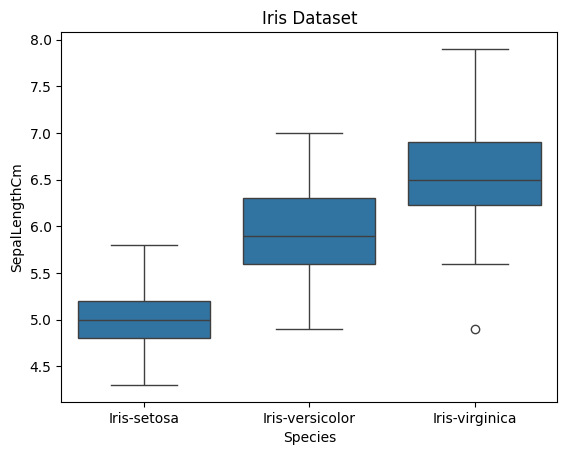

In [12]:
# Strip leading spaces from column names
df.columns = df.columns.str.strip()

# Now try the boxplot again
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title("Iris Dataset")
plt.show()

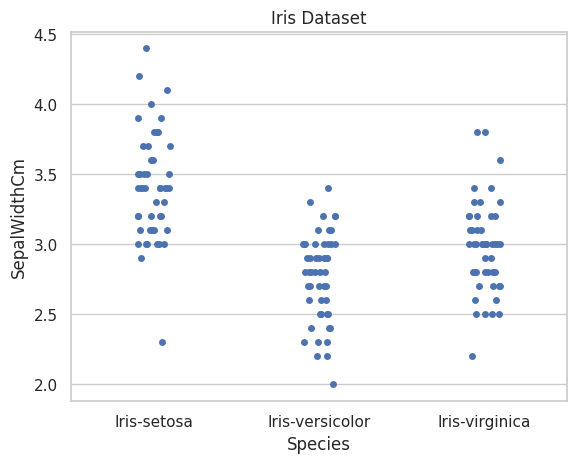

In [13]:
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x ='Species',y = 'SepalWidthCm',data = df);
plt.title('Iris Dataset')
plt.show()

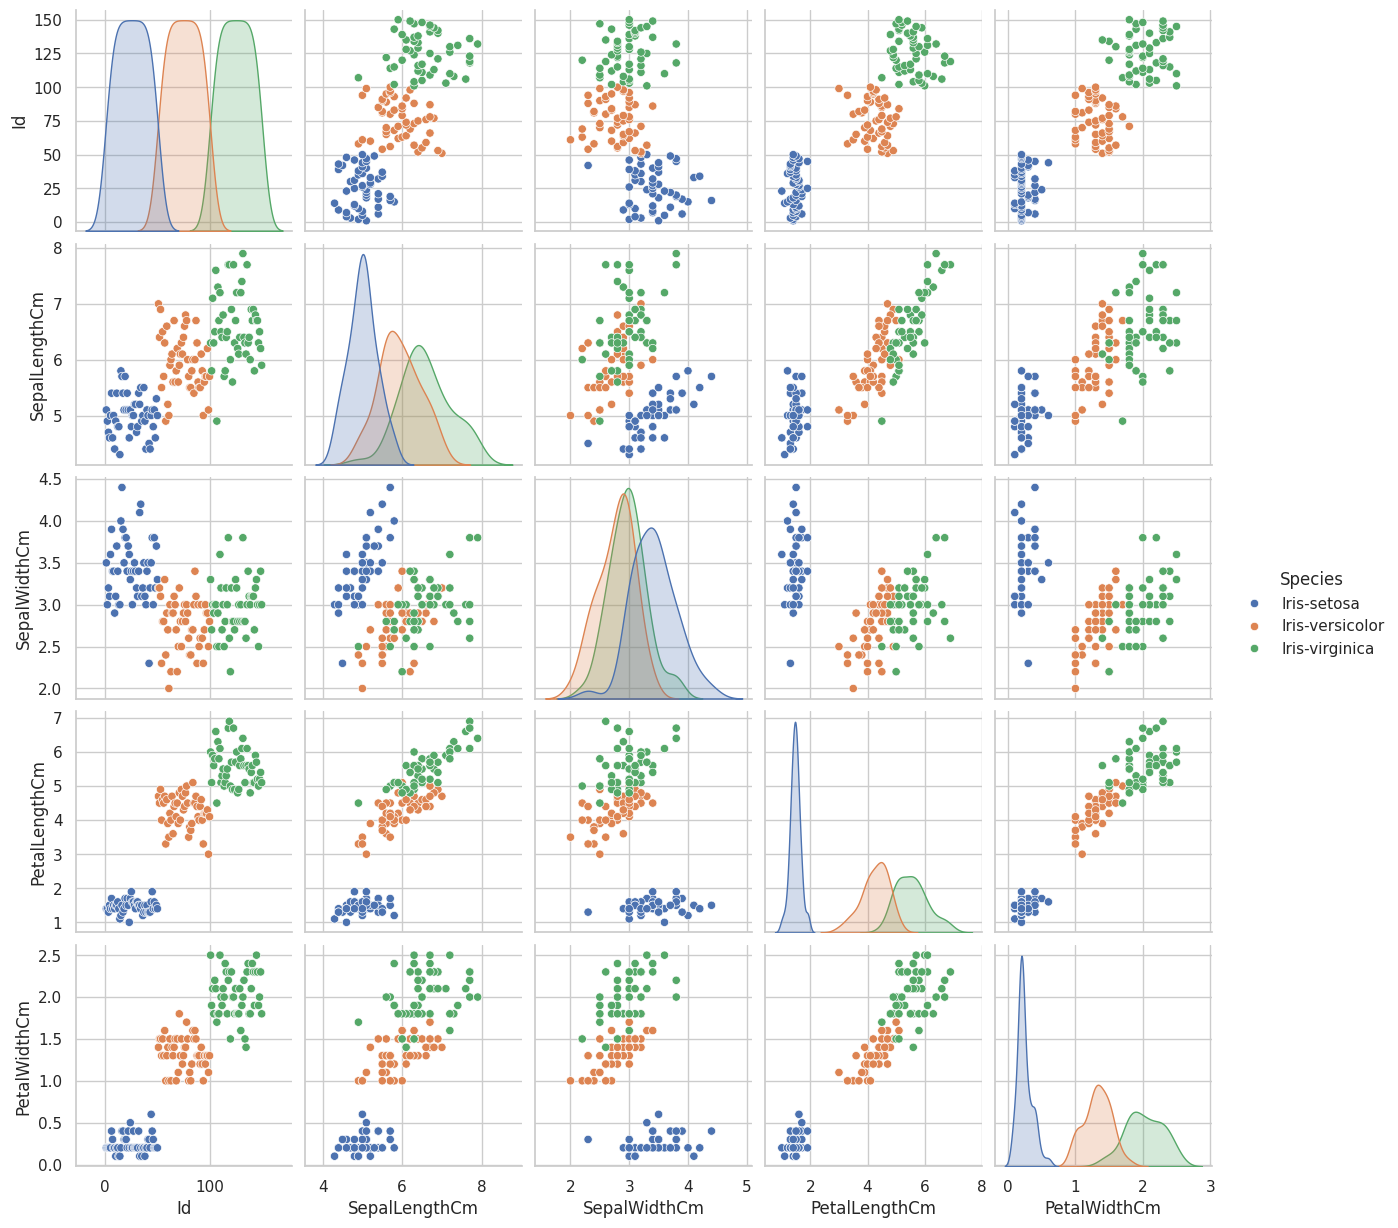

In [14]:
sns.pairplot(df, hue='Species')


<Axes: >

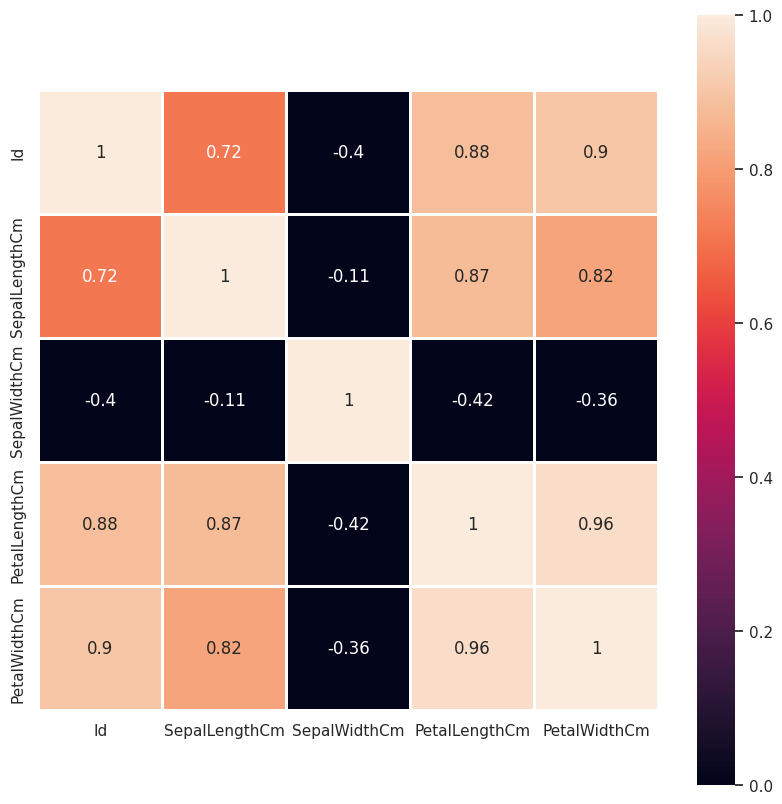

In [15]:
## using heatmap to visulaize data
# Drop non-numeric columns before calculating correlation
iris1 = df.drop('Species', axis=1).corr() #finding correlation between variables of iris dataset

fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(iris1,vmin=0,vmax=1,square=True,annot=True,linewidth=1)

### Data preprocessing

In [16]:
target=df['Species']
df1=df.copy()
df1=df.drop('Species', axis=1)
df1.shape

(150, 5)

In [17]:
#defining the attributes and labels
X=df.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
y=df['Species'].values
df.shape

(150, 6)

### Trainig the model

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)

Traingin split: (120, 4)
Testin spllit: (30, 4)


In [19]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier()

### Classification Report and Confusion Matrix

In [20]:
y_pred=dtree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
acc = sm.accuracy_score(y_test,y_pred)
print("The Accuracy is: {0}%".format(acc*100))

The Accuracy is: 100.0%


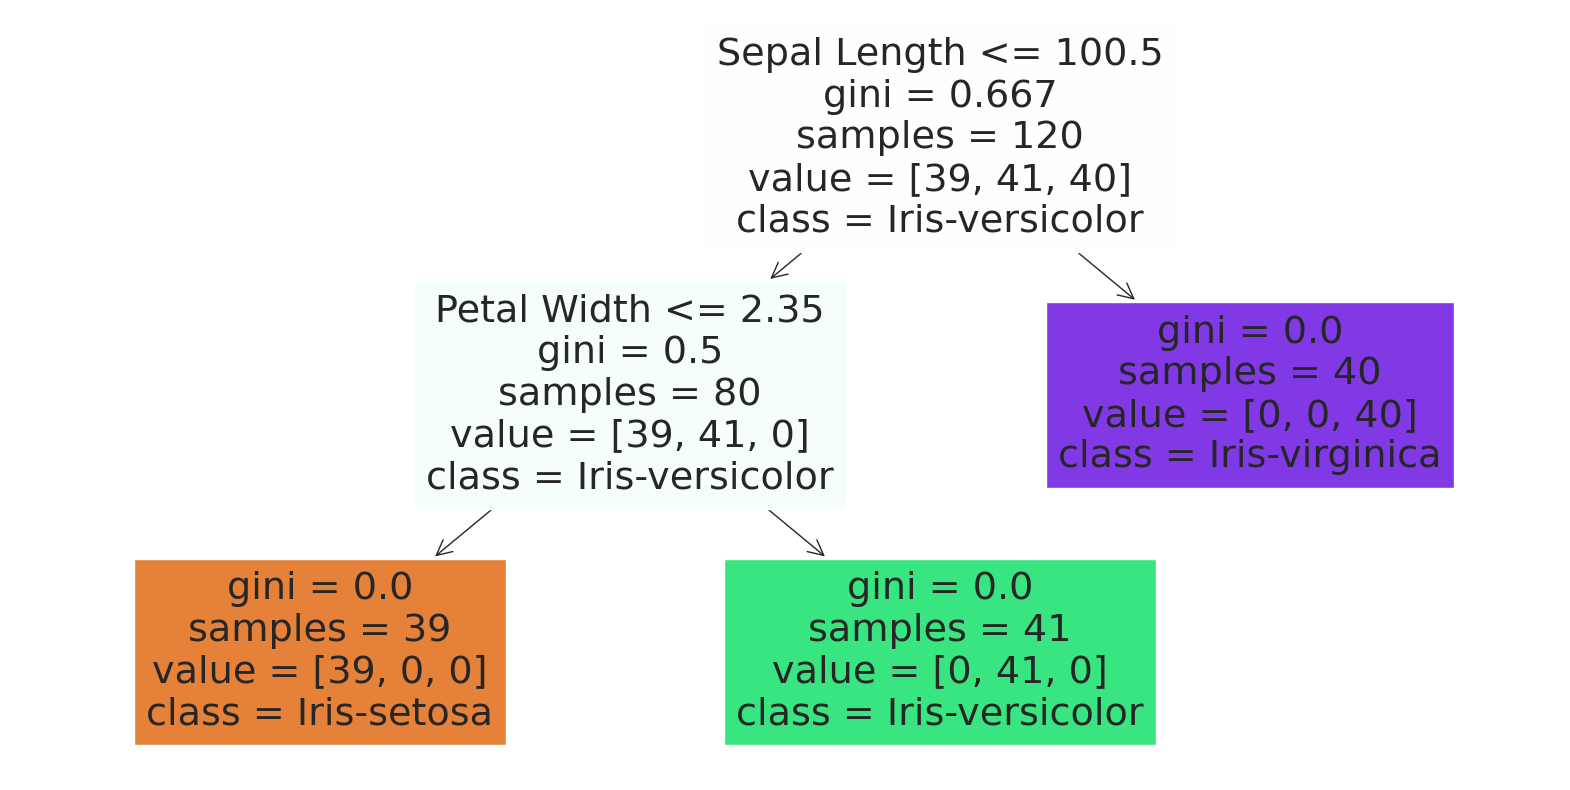

In [23]:
# Import the matplotlib library
import matplotlib.pyplot as plt

#visualizing the graph
plt.figure(figsize=(20,10))
# tree=plot_tree(dtree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
feature=['Sepal Length','Sepal Width','Petal Length','Petal Width']
class_name =['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plot_tree(dtree, filled = True,class_names=class_name,feature_names=feature);
plt.show()